In [1]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, matthews_corrcoef
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import catboost

# Load the dataset
file_path = r'C:\Users\hadis\OneDrive\My One Drive (Hadiseh)\H Documents\Datascience-Seminar\churn\Dataset\Bank Customer Churn Prediction.csv'
df = pd.read_csv(file_path)

# Preprocessing: Handle categorical and numerical features
# Drop customer_id 
X = df.drop(['customer_id', 'churn'], axis=1)
y = df['churn']

# One-hot encode categorical variables (e.g., country, gender)
X = pd.get_dummies(X, drop_first=True)

# Label encode target variable (churn)
y = LabelEncoder().fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models to compare
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Extra Trees Classifier": ExtraTreesClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "CatBoost": catboost.CatBoostClassifier(verbose=0),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate each model
for model_name, model in models.items():
    with mlflow.start_run():
        try:
            # Train model
            model.fit(X_train_scaled, y_train)

            # Make predictions
            predictions = model.predict(X_test_scaled)
            probabilities = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None

            # Calculate evaluation metrics
            accuracy = accuracy_score(y_test, predictions)
            precision = precision_score(y_test, predictions)
            recall = recall_score(y_test, predictions)
            f1 = f1_score(y_test, predictions)
            auc = roc_auc_score(y_test, probabilities) if probabilities is not None else None
            mcc = matthews_corrcoef(y_test, predictions)

            # Generate classification report
            class_report = classification_report(y_test, predictions, target_names=['No Churn', 'Churn'])

            # Log parameters and metrics
            mlflow.log_param("model_name", model_name)
            mlflow.log_metric("accuracy", accuracy)
            mlflow.log_metric("precision", precision)
            mlflow.log_metric("recall", recall)
            mlflow.log_metric("f1", f1)
            mlflow.log_metric("mcc", mcc)
            if auc is not None:
                mlflow.log_metric("auc", auc)

            # Save confusion matrix as artifact
            cm = confusion_matrix(y_test, predictions)
            cm_filename = f"confusion_matrix_{model_name}.npy"
            np.save(cm_filename, cm)
            mlflow.log_artifact(cm_filename)

            # Log the model
            mlflow.sklearn.log_model(model, model_name)

            # Print evaluation results for each model
            print(f"Results for {model_name}:")
            print(f"Accuracy: {accuracy:.2f}")
            print(f"Precision: {precision:.2f}")
            print(f"Recall: {recall:.2f}")
            print(f"F1 Score: {f1:.2f}")
            print(f"MCC: {mcc:.2f}")
            print(f"AUC: {auc:.2f}")
            print("Classification Report:")
            print(class_report)
            print("-" * 60)
        except Exception as e:
            print(f"Error training {model_name}: {e}")




Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None

Missing Values:
customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              

2024/12/07 16:44:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Results for Logistic Regression:
Accuracy: 0.81
Precision: 0.54
Recall: 0.20
F1 Score: 0.29
MCC: 0.24
AUC: 0.77
Classification Report:
              precision    recall  f1-score   support

    No Churn       0.83      0.96      0.89      2416
       Churn       0.54      0.20      0.29       584

    accuracy                           0.81      3000
   macro avg       0.69      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000

------------------------------------------------------------


2024/12/07 16:44:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Results for Decision Tree:
Accuracy: 0.81
Precision: 0.52
Recall: 0.54
F1 Score: 0.53
MCC: 0.41
AUC: 0.71
Classification Report:
              precision    recall  f1-score   support

    No Churn       0.89      0.88      0.88      2416
       Churn       0.52      0.54      0.53       584

    accuracy                           0.81      3000
   macro avg       0.70      0.71      0.70      3000
weighted avg       0.81      0.81      0.81      3000

------------------------------------------------------------


2024/12/07 16:44:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
C:\Users\hadis\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:44:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Results for Random Forest:
Accuracy: 0.87
Precision: 0.75
Recall: 0.46
F1 Score: 0.57
MCC: 0.52
AUC: 0.86
Classification Report:
              precision    recall  f1-score   support

    No Churn       0.88      0.96      0.92      2416
       Churn       0.75      0.46      0.57       584

    accuracy                           0.87      3000
   macro avg       0.82      0.71      0.75      3000
weighted avg       0.86      0.87      0.85      3000

------------------------------------------------------------


2024/12/07 16:44:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Results for XGBoost:
Accuracy: 0.86
Precision: 0.72
Recall: 0.49
F1 Score: 0.58
MCC: 0.52
AUC: 0.84
Classification Report:
              precision    recall  f1-score   support

    No Churn       0.89      0.95      0.92      2416
       Churn       0.72      0.49      0.58       584

    accuracy                           0.86      3000
   macro avg       0.80      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000

------------------------------------------------------------


2024/12/07 16:44:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
C:\Users\hadis\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Results for Extra Trees Classifier:
Accuracy: 0.86
Precision: 0.74
Recall: 0.43
F1 Score: 0.55
MCC: 0.50
AUC: 0.84
Classification Report:
              precision    recall  f1-score   support

    No Churn       0.88      0.96      0.92      2416
       Churn       0.74      0.43      0.55       584

    accuracy                           0.86      3000
   macro avg       0.81      0.70      0.73      3000
weighted avg       0.85      0.86      0.85      3000

------------------------------------------------------------


2024/12/07 16:44:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Results for AdaBoost:
Accuracy: 0.86
Precision: 0.72
Recall: 0.48
F1 Score: 0.58
MCC: 0.51
AUC: 0.85
Classification Report:
              precision    recall  f1-score   support

    No Churn       0.88      0.95      0.92      2416
       Churn       0.72      0.48      0.58       584

    accuracy                           0.86      3000
   macro avg       0.80      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000

------------------------------------------------------------


2024/12/07 16:44:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Results for CatBoost:
Accuracy: 0.87
Precision: 0.77
Recall: 0.49
F1 Score: 0.60
MCC: 0.55
AUC: 0.87
Classification Report:
              precision    recall  f1-score   support

    No Churn       0.89      0.97      0.92      2416
       Churn       0.77      0.49      0.60       584

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000

------------------------------------------------------------


2024/12/07 16:45:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Results for SVM:
Accuracy: 0.86
Precision: 0.80
Recall: 0.38
F1 Score: 0.52
MCC: 0.49
AUC: 0.82
Classification Report:
              precision    recall  f1-score   support

    No Churn       0.87      0.98      0.92      2416
       Churn       0.80      0.38      0.52       584

    accuracy                           0.86      3000
   macro avg       0.83      0.68      0.72      3000
weighted avg       0.85      0.86      0.84      3000

------------------------------------------------------------


2024/12/07 16:45:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Results for KNN:
Accuracy: 0.83
Precision: 0.63
Recall: 0.36
F1 Score: 0.46
MCC: 0.39
AUC: 0.75
Classification Report:
              precision    recall  f1-score   support

    No Churn       0.86      0.95      0.90      2416
       Churn       0.63      0.36      0.46       584

    accuracy                           0.83      3000
   macro avg       0.74      0.65      0.68      3000
weighted avg       0.81      0.83      0.81      3000

------------------------------------------------------------


2024/12/07 16:45:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Results for Naive Bayes:
Accuracy: 0.83
Precision: 0.62
Recall: 0.36
F1 Score: 0.46
MCC: 0.38
AUC: 0.80
Classification Report:
              precision    recall  f1-score   support

    No Churn       0.86      0.95      0.90      2416
       Churn       0.62      0.36      0.46       584

    accuracy                           0.83      3000
   macro avg       0.74      0.66      0.68      3000
weighted avg       0.81      0.83      0.81      3000

------------------------------------------------------------


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None

Missing Values:
customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              

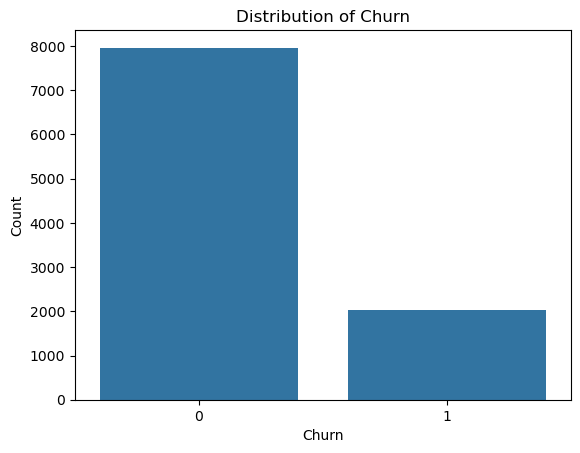

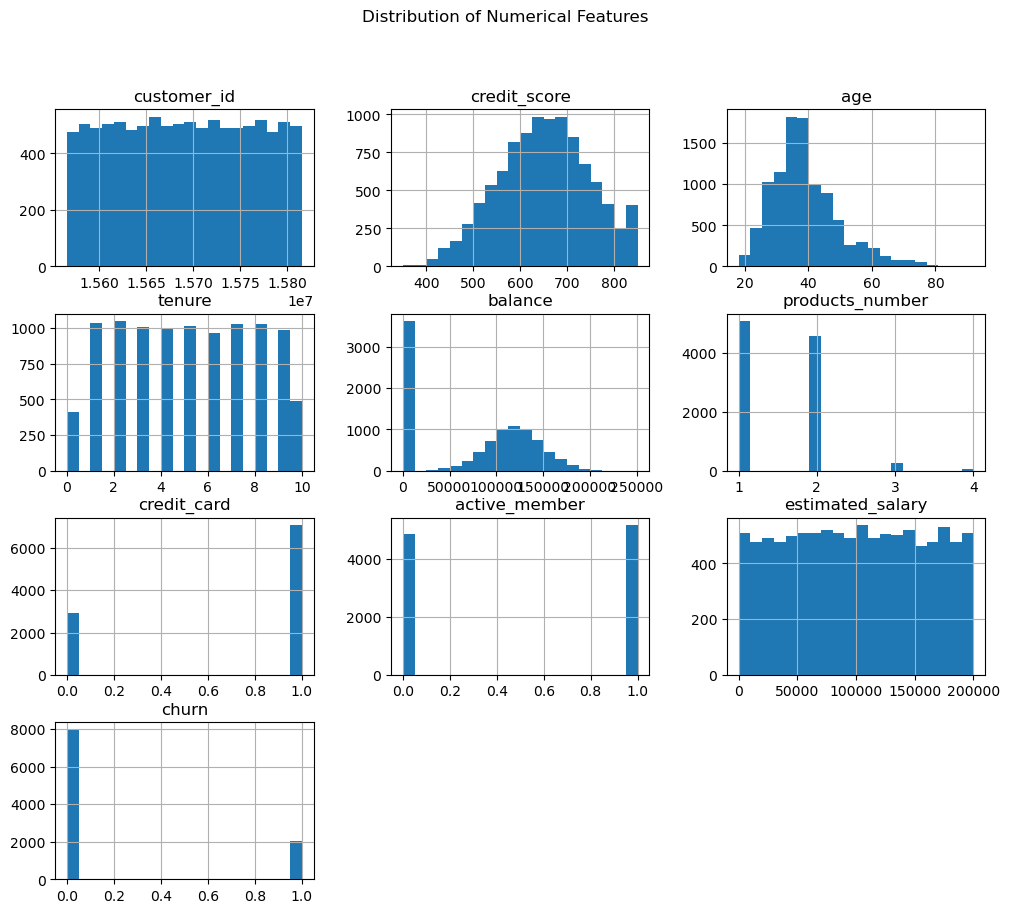

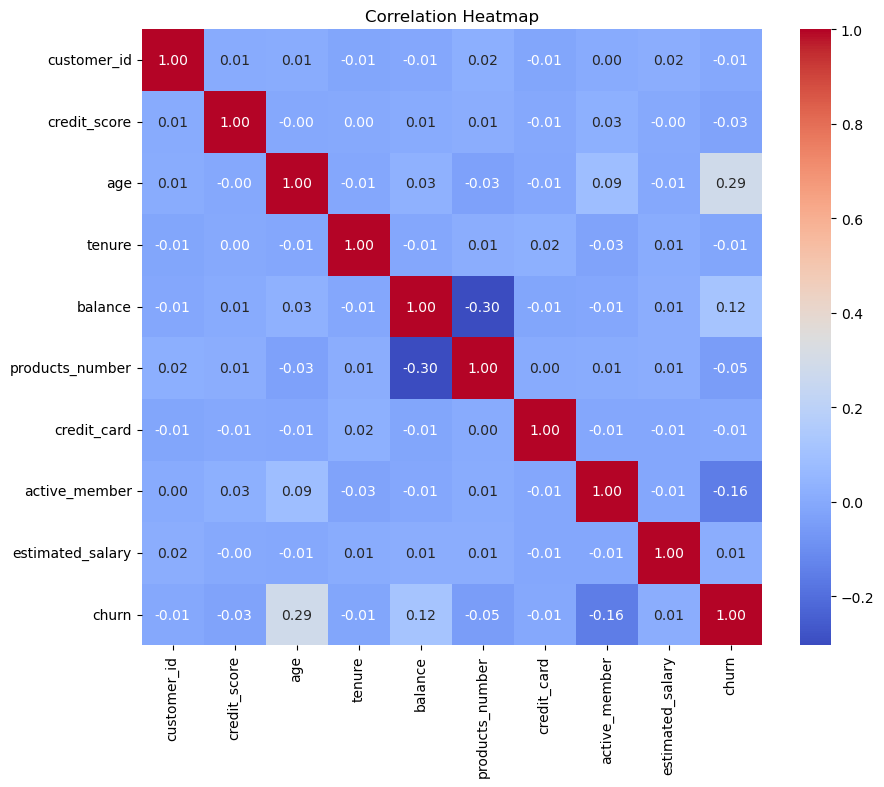

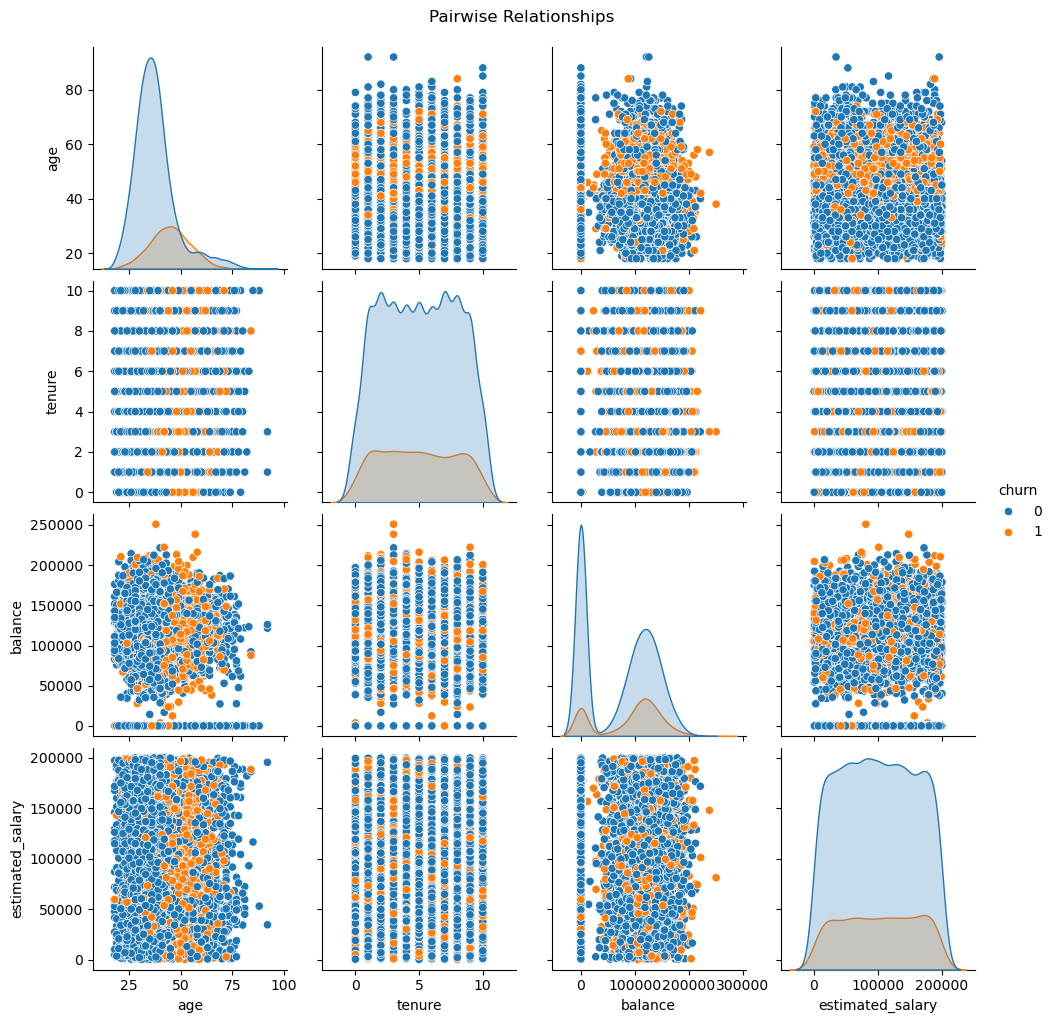

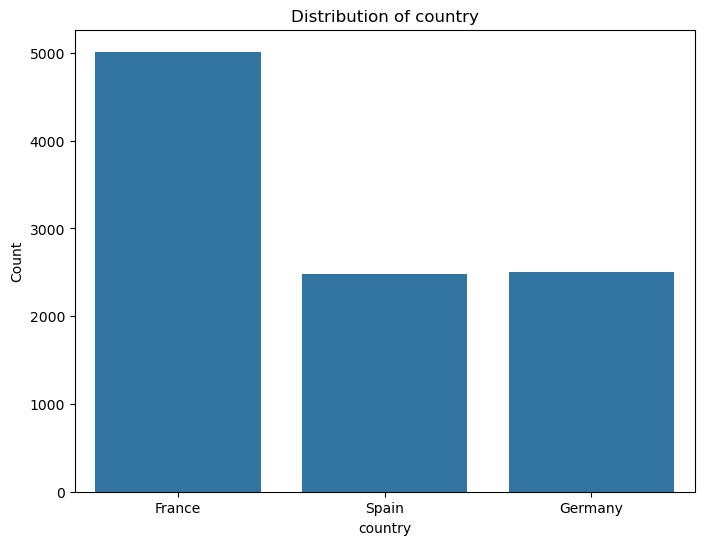

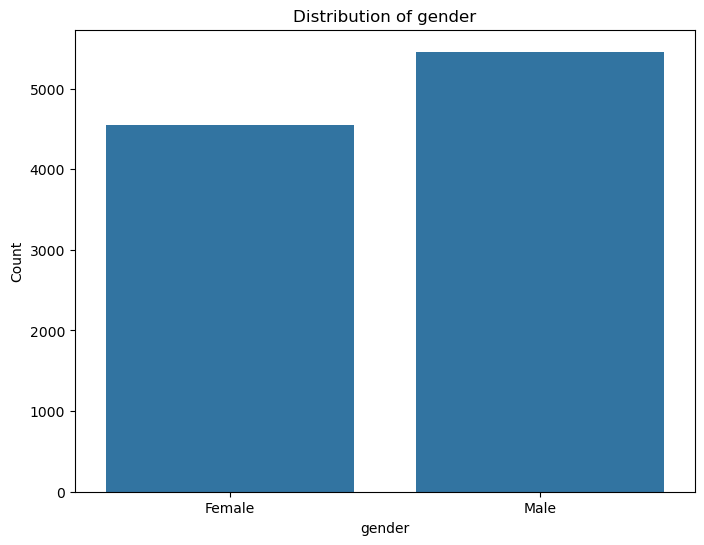

In [8]:
# Exploratory Data Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\hadis\OneDrive\My One Drive (Hadiseh)\H Documents\Datascience-Seminar\churn\Dataset\Bank Customer Churn Prediction.csv'
df = pd.read_csv(file_path)

# Dataset overview
print("Dataset Overview:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Visualizing the target variable distribution
sns.countplot(x='churn', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Visualizing numerical feature distributions
numerical_features = df.select_dtypes(include=[np.number]).columns

# Check for missing numerical features
df[numerical_features].hist(figsize=(12, 10), bins=20)
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Correlation heatmap to analyze relationships among numerical features
corr_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Pair plot for selected features to check pairwise relationships
selected_features = ['age', 'tenure', 'balance', 'estimated_salary', 'churn']
sns.pairplot(df[selected_features], hue='churn')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

# Visualizing categorical features
categorical_features = ['country', 'gender']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

